In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 66.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=5a556d1bc95975e333fba0b368016a2a256cef0d9f7b7b95958cacadb3bae2a4
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=308ba0783633836a52a20b0af83a89785626cbea2d8f5dafc8380e4413fc9057
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import nltk; nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
consumer_key="bc7OoZ09GIATOldylYMT5l071"
consumer_secret="sFeb9vrdPMzv7JdHldL4bGHgHx0GTeQB0xL3aDWz0Mt2nnYqJl"
access_token="1388521805271375878-MnmGP3qg1KOxeIMG2L5BywtNkxGQas"
access_token_secret="djotPBXWyiffdm0jWmYElFpQh24CSBQ0eZ8PWZfjBWNXY"

In [ ]:
# Authentication
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
#date_tweets = tweepy.Cursor(api.search, q="@derkern", since="2020-5-31", tweet_mode='extended').items(100)

In [ ]:
tweets = tweepy.Cursor(api.user_timeline, screen_name="Stocks" ,date_since = "2006-01-01" ,date_until = "2022-03-31", tweet_mode='extended').items(500)

In [ ]:
list = []
for tweet in tweets:
    text = tweet._json["full_text"]

    refined_tweet = {'Tweets' : text,

                    'Date' : tweet.created_at}

    list.append(refined_tweet)

In [ ]:
df = pd.DataFrame(list)
df

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Final_Dataset1.csv to Final_Dataset1.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Final_Dataset1.csv']))
df

,Date,Company Name,Tweets
0,11/29/2022 17:30,ACL Cables,@Miracle_Island @CSEstockguide @crewforshoots ...
1,10/16/2022 10:32,ACL Cables,"@MiracleStock So far , LK haven't had a perso..."
2,10/15/2022 15:28,Amana Bank,@OshanDeshapriya This is not for investing exp...
3,10/15/2022 8:04,ACL Cables,@MiracleStock Fyi.. https://t.co/YrOqn39wPl
4,10/15/2022 4:41,Arpico Insurance,"@finityfund In the current context, there is n..."
...,...,...,...
4940,8/18/2020 4:17,GEST,World biggest companies VS countries like Sri ...
4941,8/17/2020 4:38,DFCC,Banking sector performance last week. DFCC adv...
4942,8/17/2020 4:29,DFCC,Movement of foreign holdings in DFCC since 1st...
4943,8/13/2020 15:42,"DFCC, GEST",Does the hunch we made yesterday correct? DFCC...


In [ ]:
def clean(tex):
    tex = re.sub(r"@[A-Za-z0-9]+","",tex)
    tex = re.sub(r"#","",tex)
    tex = re.sub(r":","",tex)
    tex = re.sub(r"RT[\s]","",tex)
    tex = re.sub(r"https?:\/\/S+","",tex)
    return tex
df["Tweets"]=df["Tweets"].apply(clean)
df

,Date,Company Name,Tweets
0,11/29/2022 17:30,ACL Cables,_Island _Mindset _amila A very valid point.
1,10/16/2022 10:32,ACL Cables,"So far , LK haven't had a person who is fitt..."
2,10/15/2022 15:28,Amana Bank,This is not for investing experts like you..t...
3,10/15/2022 8:04,ACL Cables,Fyi.. https//t.co/YrOqn39wPl
4,10/15/2022 4:41,Arpico Insurance,"In the current context, there is no better in..."
...,...,...,...
4940,8/18/2020 4:17,GEST,World biggest companies VS countries like Sri ...
4941,8/17/2020 4:38,DFCC,Banking sector performance last week. DFCC adv...
4942,8/17/2020 4:29,DFCC,Movement of foreign holdings in DFCC since 1st...
4943,8/13/2020 15:42,"DFCC, GEST",Does the hunch we made yesterday correct? DFCC...


In [ ]:
# subjectivity(opinion on the text)
def get_subject(tex):
    return TextBlob(tex).sentiment.subjectivity
# polarity (how positive or negative of the text)
def get_pola(tex):
    return TextBlob(tex).sentiment.polarity
for index, row in df["Tweets"].iteritems():
        score = SentimentIntensityAnalyzer().polarity_scores(row)
        neg = score["neg"]
        neu = score["neu"]
        pos = score["pos"]
        comp = score["compound"]
        df.loc[index, "Negative"] = neg
        df.loc[index, "Neutral"] = neu
        df.loc[index, "Positive"] = pos
        df.loc[index, "Compound"] = comp

df["Subjectivity"]=df["Tweets"].apply(get_subject)
df["Polarity"]=df["Tweets"].apply(get_pola)

df

,Date,Company Name,Tweets,Negative,Neutral,Positive,Compound,Subjectivity,Polarity
0,11/29/2022 17:30,ACL Cables,_Island _Mindset _amila A very valid point.,0.000,1.000,0.000,0.0000,0.300000,0.200000
1,10/16/2022 10:32,ACL Cables,"So far , LK haven't had a person who is fitt...",0.000,1.000,0.000,0.0000,0.666667,0.200000
2,10/15/2022 15:28,Amana Bank,This is not for investing experts like you..t...,0.155,0.700,0.146,-0.0772,0.525000,-0.150000
3,10/15/2022 8:04,ACL Cables,Fyi.. https//t.co/YrOqn39wPl,0.000,1.000,0.000,0.0000,0.000000,0.000000
4,10/15/2022 4:41,Arpico Insurance,"In the current context, there is no better in...",0.189,0.735,0.076,-0.5106,0.533333,-0.058333
...,...,...,...,...,...,...,...,...,...
4940,8/18/2020 4:17,GEST,World biggest companies VS countries like Sri ...,0.000,0.722,0.278,0.5362,0.000000,0.000000
4941,8/17/2020 4:38,DFCC,Banking sector performance last week. DFCC adv...,0.191,0.759,0.050,-0.6486,0.422917,0.143750
4942,8/17/2020 4:29,DFCC,Movement of foreign holdings in DFCC since 1st...,0.084,0.916,0.000,-0.6312,0.525000,-0.050000
4943,8/13/2020 15:42,"DFCC, GEST",Does the hunch we made yesterday correct? DFCC...,0.000,1.000,0.000,0.0000,0.000000,0.000000


In [ ]:
def sentiAnalysis(value):
    if value > 0:
        return "Positive"
    elif value == 0:
        return "Neutral"
    else:
        return "Negative"
df["Sentiment_Analysis"]=df["Polarity"].apply(sentiAnalysis)
df

,Date,Company Name,Tweets,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis
0,11/29/2022 17:30,ACL Cables,_Island _Mindset _amila A very valid point.,0.000,1.000,0.000,0.0000,0.300000,0.200000,Positive
1,10/16/2022 10:32,ACL Cables,"So far , LK haven't had a person who is fitt...",0.000,1.000,0.000,0.0000,0.666667,0.200000,Positive
2,10/15/2022 15:28,Amana Bank,This is not for investing experts like you..t...,0.155,0.700,0.146,-0.0772,0.525000,-0.150000,Negative
3,10/15/2022 8:04,ACL Cables,Fyi.. https//t.co/YrOqn39wPl,0.000,1.000,0.000,0.0000,0.000000,0.000000,Neutral
4,10/15/2022 4:41,Arpico Insurance,"In the current context, there is no better in...",0.189,0.735,0.076,-0.5106,0.533333,-0.058333,Negative
...,...,...,...,...,...,...,...,...,...,...
4940,8/18/2020 4:17,GEST,World biggest companies VS countries like Sri ...,0.000,0.722,0.278,0.5362,0.000000,0.000000,Neutral
4941,8/17/2020 4:38,DFCC,Banking sector performance last week. DFCC adv...,0.191,0.759,0.050,-0.6486,0.422917,0.143750,Positive
4942,8/17/2020 4:29,DFCC,Movement of foreign holdings in DFCC since 1st...,0.084,0.916,0.000,-0.6312,0.525000,-0.050000,Negative
4943,8/13/2020 15:42,"DFCC, GEST",Does the hunch we made yesterday correct? DFCC...,0.000,1.000,0.000,0.0000,0.000000,0.000000,Neutral


In [ ]:
from google.colab import files
df.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_negative = df[df["Sentiment_Analysis"]=="Negative"]
df_negative

,Date,Company Name,Tweets,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis
2,10/15/2022 15:28,Amana Bank,This is not for investing experts like you..t...,0.155,0.700,0.146,-0.0772,0.525000,-0.150000,Negative
4,10/15/2022 4:41,Arpico Insurance,"In the current context, there is no better in...",0.189,0.735,0.076,-0.5106,0.533333,-0.058333,Negative
6,10/15/2022 2:51,Amana Bank,Never liquidate your fixed deposit and buy sto...,0.097,0.846,0.057,-0.2278,0.466667,-0.063333,Negative
7,10/9/2022 8:26,Aitken Spence,Spend time on studying investing psychology. \...,0.113,0.856,0.030,-0.5574,0.243750,-0.006250,Negative
20,9/10/2022 9:28,ACL Cables,"_S Indeed. With Trinco base,...",0.000,0.894,0.106,0.3818,0.950000,-0.400000,Negative
...,...,...,...,...,...,...,...,...,...,...
4936,8/20/2020 16:26,"COMB, DFCC, NDB",DFCC and NDB continued their uptrend.\n\nBefor...,0.062,0.938,0.000,-0.4019,0.281250,-0.112500,Negative
4938,8/19/2020 8:43,BIL,How casually our generation accepted the insa...,0.126,0.698,0.177,0.0258,0.955556,-0.722222,Negative
4939,8/18/2020 16:28,DFCC,DFCC foreign selling seem to be over...\nhttps...,0.000,1.000,0.000,0.0000,0.125000,-0.125000,Negative
4942,8/17/2020 4:29,DFCC,Movement of foreign holdings in DFCC since 1st...,0.084,0.916,0.000,-0.6312,0.525000,-0.050000,Negative


In [ ]:
df_positive = df[df["Sentiment_Analysis"]=="Positive"]
df_positive

,Date,Company Name,Tweets,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis
0,11/29/2022 17:30,ACL Cables,_Island _Mindset _amila A very valid point.,0.000,1.000,0.000,0.0000,0.300000,0.200000,Positive
1,10/16/2022 10:32,ACL Cables,"So far , LK haven't had a person who is fitt...",0.000,1.000,0.000,0.0000,0.666667,0.200000,Positive
5,10/15/2022 3:38,ACL Cables,Very true. If someone started investing in Ja...,0.184,0.659,0.157,-0.1361,0.672500,0.227500,Positive
8,10/9/2022 8:02,Aitken Spence,Don't waste too much time on WhatsApp groups a...,0.047,0.838,0.115,0.4822,0.341667,0.125000,Positive
9,9/24/2022 9:09,ACL Cables,_Island _wij LIOC will be used as the key too...,0.000,0.916,0.084,0.5093,0.458333,0.187500,Positive
...,...,...,...,...,...,...,...,...,...,...
4930,8/26/2020 15:01,"HNB, JKH, LOLC",_nilanga I believe LOLC is a wonderful long te...,0.000,0.787,0.213,0.8481,0.493750,0.300000,Positive
4931,8/25/2020 16:39,"ECL,TILE, LWL",As expected Tile sector remained active in a m...,0.055,0.709,0.237,0.8402,0.366667,0.111111,Positive
4933,8/25/2020 13:49,EAST,Most likely no vehicle imports at least for an...,0.111,0.829,0.060,-0.2983,0.533333,0.041667,Positive
4937,8/20/2020 8:31,ABL,Probably before the election a correction ma...,0.197,0.757,0.046,-0.7003,0.213889,0.025000,Positive


In [ ]:
df_neutral = df[df["Sentiment_Analysis"]=="Neutral"]
df_neutral

,Date,Company Name,Tweets,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis
3,10/15/2022 8:04,ACL Cables,Fyi.. https//t.co/YrOqn39wPl,0.000,1.000,0.000,0.0000,0.000,0.0,Neutral
12,9/23/2022 16:00,Browns Investments,"""Sri Lanka expects the International Monetary ...",0.000,1.000,0.000,0.0000,0.125,0.0,Neutral
19,9/10/2022 9:52,ACL Cables,_S Yes. With a possible sha...,0.083,0.635,0.282,0.6124,0.650,0.0,Neutral
27,7/15/2022 13:05,"Balangoda Plantations,Central Finance Company",_g _sl While big banks are thinking ab...,0.083,0.831,0.086,0.0258,0.100,0.0,Neutral
33,6/21/2022 13:45,Alliance Finance Company,CSE https//t.co/OREuFsx5Kl,0.000,1.000,0.000,0.0000,0.000,0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...
4922,9/1/2020 3:53,"ACL, BIL",How Warren Buffett made his billions and beca...,0.000,1.000,0.000,0.0000,0.000,0.0,Neutral
4925,8/31/2020 16:04,BIL,Bill Gates gift to his billionaire pal Warren ...,0.000,0.699,0.301,0.7840,0.000,0.0,Neutral
4935,8/21/2020 5:09,PARA,Anilana Hotels announced a cash call 122% abov...,0.000,1.000,0.000,0.0000,0.100,0.0,Neutral
4940,8/18/2020 4:17,GEST,World biggest companies VS countries like Sri ...,0.000,0.722,0.278,0.5362,0.000,0.0,Neutral


In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
pc=count_values_in_column(df,"Sentiment_Analysis")
pc

,Total,Percentage
Positive,2466,49.87
Neutral,1652,33.41
Negative,827,16.72


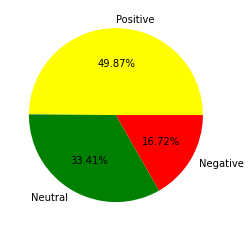

<Figure size 1000x1000 with 0 Axes>

In [ ]:
names=pc.index
size=pc["Percentage"]
plt.pie(size, labels=names, colors=["yellow","green","red"],autopct='%1.2f%%')
plt.style.use("default")
plt.figure(figsize=(10,10))
plt.show()

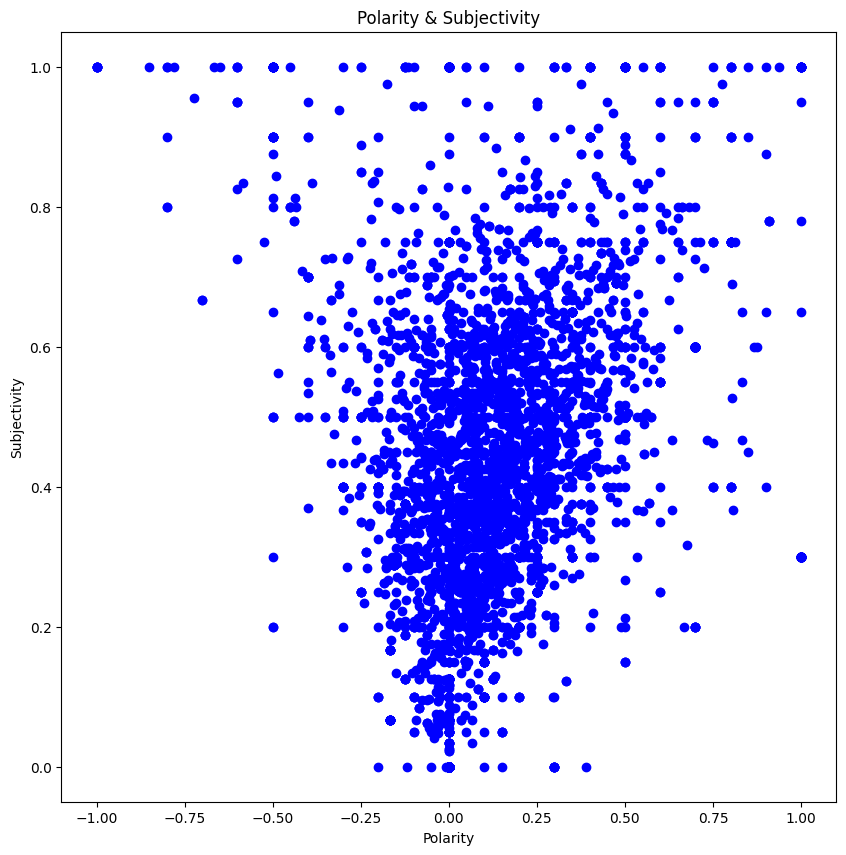

In [ ]:
plt.figure(figsize=(10,10))
for i in range (0,df.shape[0]):
    plt.scatter(df["Polarity"][i],df["Subjectivity"][i],color="Blue")
plt.title("Polarity & Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

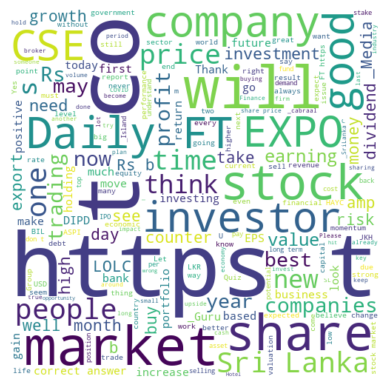

In [ ]:
allwords=" ".join([twts for twts in df["Tweets"]])
wordcloud=WordCloud(width=500,height=500,background_color="white",random_state=24,max_font_size=150).generate(allwords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

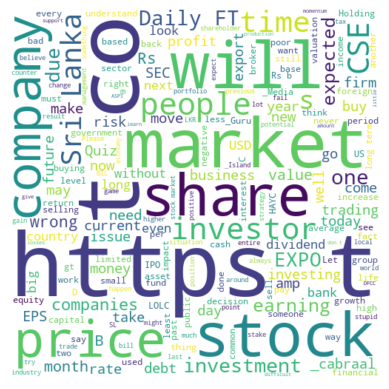

In [ ]:
allwords_negative=" ".join([twts for twts in df_negative["Tweets"]])
wordcloud=WordCloud(width=500,height=500,background_color="white",random_state=24,max_font_size=150).generate(allwords_negative)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

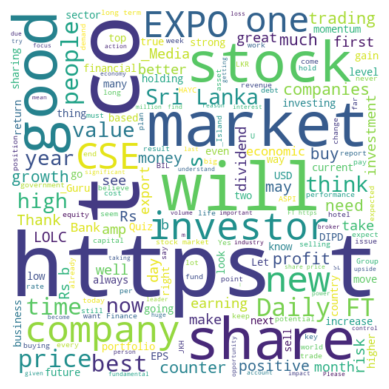

In [ ]:
allwords_positive=" ".join([twts for twts in df_positive["Tweets"]])
wordcloud=WordCloud(width=500,height=500,background_color="white",random_state=24,max_font_size=150).generate(allwords_positive)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

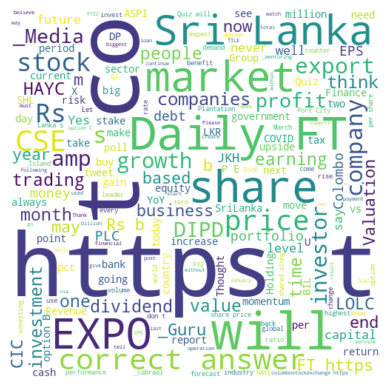

In [ ]:
allwords_neutral=" ".join([twts for twts in df_neutral["Tweets"]])
wordcloud=WordCloud(width=500,height=500,background_color="white",random_state=24,max_font_size=150).generate(allwords_neutral)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show

In [ ]:
df["text_len"] = df["Tweets"].astype(str).apply(len)
df["text_word_count"] = df["Tweets"].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(df.groupby("Sentiment_Analysis").text_len.mean()),2)

,text_len
Sentiment_Analysis,
Negative,182.84
Neutral,96.68
Positive,172.54


In [ ]:
round(pd.DataFrame(df.groupby("Sentiment_Analysis").text_word_count.mean()),2)

,text_word_count
Sentiment_Analysis,
Negative,30.11
Neutral,15.09
Positive,28.65


In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', "", text)
 return text
df["punct"] = df["Tweets"].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split("\W+", text)
    return text
df['tokenized'] = df['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['nonstop'].apply(lambda x: stemming(x))

#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df

,Date,Company Name,Tweets,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,11/29/2022 17:30,ACL Cables,_Island _Mindset _amila A very valid point.,0.000,1.000,0.000,0.0000,0.300000,0.200000,Positive,46,7,Island Mindset amila A very valid point,"[island, mindset, amila, a, very, valid, point]","[island, mindset, amila, valid, point]","[island, mindset, amila, valid, point]"
1,10/16/2022 10:32,ACL Cables,"So far , LK haven't had a person who is fitt...",0.000,1.000,0.000,0.0000,0.666667,0.200000,Positive,94,21,So far LK havent had a person who is fittin...,"[, so, far, lk, havent, had, a, person, who, i...","[, far, lk, havent, person, fitting, pet, dog,...","[, far, lk, havent, person, fit, pet, dog, ima..."
2,10/15/2022 15:28,Amana Bank,This is not for investing experts like you..t...,0.155,0.700,0.146,-0.0772,0.525000,-0.150000,Negative,159,28,This is not for investing experts like youthi...,"[, this, is, not, for, investing, experts, lik...","[, investing, experts, like, youthis, poor, in...","[, invest, expert, like, youthi, poor, investo..."
3,10/15/2022 8:04,ACL Cables,Fyi.. https//t.co/YrOqn39wPl,0.000,1.000,0.000,0.0000,0.000000,0.000000,Neutral,29,2,Fyi httpstcoYrOqn3wPl,"[, fyi, httpstcoyroqn3wpl]","[, fyi, httpstcoyroqn3wpl]","[, fyi, httpstcoyroqn3wpl]"
4,10/15/2022 4:41,Arpico Insurance,"In the current context, there is no better in...",0.189,0.735,0.076,-0.5106,0.533333,-0.058333,Negative,224,32,In the current context there is no better inv...,"[, in, the, current, context, there, is, no, b...","[, current, context, better, investment, fds, ...","[, current, context, better, invest, fd, justi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,8/18/2020 4:17,GEST,World biggest companies VS countries like Sri ...,0.000,0.722,0.278,0.5362,0.000000,0.000000,Neutral,80,10,World biggest companies VS countries like Sri ...,"[world, biggest, companies, vs, countries, lik...","[world, biggest, companies, vs, countries, lik...","[world, biggest, compani, vs, countri, like, s..."
4941,8/17/2020 4:38,DFCC,Banking sector performance last week. DFCC adv...,0.191,0.759,0.050,-0.6486,0.422917,0.143750,Positive,177,26,Banking sector performance last week DFCC adva...,"[banking, sector, performance, last, week, dfc...","[banking, sector, performance, last, week, dfc...","[bank, sector, perform, last, week, dfcc, adva..."
4942,8/17/2020 4:29,DFCC,Movement of foreign holdings in DFCC since 1st...,0.084,0.916,0.000,-0.6312,0.525000,-0.050000,Negative,299,48,Movement of foreign holdings in DFCC since 1st...,"[movement, of, foreign, holdings, in, dfcc, si...","[movement, foreign, holdings, dfcc, since, 1st...","[movement, foreign, hold, dfcc, sinc, 1st, jul..."
4943,8/13/2020 15:42,"DFCC, GEST",Does the hunch we made yesterday correct? DFCC...,0.000,1.000,0.000,0.0000,0.000000,0.000000,Neutral,124,18,Does the hunch we made yesterday correct DFCC ...,"[does, the, hunch, we, made, yesterday, correc...","[hunch, made, yesterday, correct, dfcc, start,...","[hunch, made, yesterday, correct, dfcc, start,..."


In [ ]:
df.to_csv('raw_data.csv', index=False)

In [ ]:
countVectorizer = CountVectorizer(analyzer=clean_text)
countVector = countVectorizer.fit_transform(df["Tweets"])
print("{} Number of reviews has {} words".format(countVector.shape[0], countVector.shape[1]))


count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df

4945 Number of reviews has 8083 words


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,a,aa,aaalka,aaic,aback,aban,abandon,abc,aberdeen,...,zeikel,zelenski,zenith,zero,zerosum,zone,zoom,zurich,zweig,zytv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
market,717
share,690
stock,602
compani,536
price,440
rs,406
invest,379
investor,366
daili,366
good,351


In [ ]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(df["Tweets"],(2,2),20)
n2_bigrams

[('daily ft', 332),
 ('sri lanka', 269),
 ('correct answer', 99),
 ('stock market', 72),
 ('ft https', 71),
 ('answer option', 70),
 ('long term', 66),
 ('share price', 48),
 ('thanks sharing', 43),
 ('port city', 42),
 ('sri lankan', 38),
 ('dividend yield', 35),
 ('cse https', 30),
 ('covid 19', 30),
 ('palm oil', 28),
 ('short term', 27),
 ('2021 https', 27),
 ('like expo', 25),
 ('dipd hayc', 25),
 ('bull market', 24)]

In [ ]:
n3_trigrams = get_top_n_gram(df["Tweets"],(3,3),20)
n3_trigrams

[('correct answer option', 70),
 ('daily ft https', 70),
 ('shared tweet end', 15),
 ('tweet end poll', 15),
 ('colombo stock market', 14),
 ('news daily mirror', 14),
 ('stock like expo', 12),
 ('business news daily', 12),
 ('daily ft says', 12),
 ('finding great investment', 11),
 ('dividend paying stocks', 11),
 ('10 successful investing', 10),
 ('successful investing finding', 10),
 ('investing finding great', 10),
 ('high dividend paying', 10),
 ('good times ahead', 9),
 ('ordinary voting shares', 8),
 ('valuation metrics doesn', 8),
 ('metrics doesn mean', 8),
 ('growth stock like', 8)]

In [ ]:
df.to_csv('raw_data.csv', index=False)